In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import matplotlib.patheffects as path_effects

def add_median_labels(ax):

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x,y - 0.05*y,f'{round(value)}',
                horizontalalignment='center',fontsize=12,color='black',weight='bold',
                       #bbox=dict(facecolor='#445A64')
                       #bbox=dict(facecolor='lightgray')
                      )
        # create median-colored border around white text for contrast
        #text.set_path_effects([
        #    path_effects.Stroke(linewidth=3, foreground=median.get_color()),
        #    path
        
def add_avg_labels(ax):
    import matplotlib.patheffects as path_effects

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    print(lines_per_box)
    # iterate over median lines
    for median in lines[5:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        #value = f'{value:.2f}'
        value = f'{value:,}'
        text = ax.text(x, y, value, ha='center', va='center',
                       fontweight='bold', color='white',
                       bbox=dict(facecolor='#445A69'))
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 1
            value = '{:,.0f}'.format(p.get_height())
            ax.text(_x, _y+400, value, 
                   horizontalalignment='right',
                    fontsize=15,
                    color='black',
                    weight='semibold', 
                    rotation="vertical"
                   ) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

flierprops = dict(markerfacecolor='grey',
markersize=8,
      #linestyle='--'
             )

In [2]:
classifier_list = os.listdir("../eval_dg_results/predictions/run_0/classification/")
clustering_list = os.listdir("../eval_dg_results/predictions/run_0/classification/DecisionTreeClassifier/")
datasets = os.listdir("../eval_dg_results/predictions/run_0/classification/DecisionTreeClassifier/Base/")

In [104]:
import ast
min_maj_acc_df = pd.DataFrame()
for classifier in classifier_list:
    for clustering in clustering_list:
        for data in datasets:
            predictions = pd.read_csv(f"../eval_dg_results/predictions/run_0/classification/{classifier}/{clustering}/{data}")
            predictions["pred_label"] = predictions["pred_label"].apply(lambda x: ast.literal_eval(x) [0] if type(x) !=int else x)
            predictions["accuracy"] = (predictions["true_label"] == predictions["pred_label"]).astype(int)
            predictions["count"] = predictions.groupby("true_label")["true_label"].transform("count")
            #median_count = predictions["count"].describe()["25%"]
            median_count = predictions["count"].median()
            predictions["class_type"] = predictions["count"].apply(lambda x: "Majority" if x > median_count else "Minority")
            class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
            class_type_acc["dataset"] = data
            class_type_acc["clustering"] = clustering
            class_type_acc["classifier"] = classifier
            min_maj_acc_df = pd.concat([min_maj_acc_df, class_type_acc])
            print(data)
            print("accuracy per class:")
            print(predictions.groupby("class_type")["accuracy", "count"].mean())

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters10_features10_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.485714  70.70
Minority    0.256250  31.25
dataset1000_clusters10_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.551181  42.606299
Minority    0.300578  12.606936
dataset1000_clusters10_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority     0.55000  46.785714
Minority     0.25625  13.600000
dataset1000_clusters10_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.543624  56.677852
Minority    0.278146  15.211921
dataset1000_clusters10_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.609023  68.849624
Minority    0.221557  23.586826
dataset1000_clusters10_features10_g

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features30_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.328571  70.70
Minority    0.168750  31.25
dataset1000_clusters10_features30_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.585714  70.70
Minority    0.237500  31.25
dataset1000_clusters10_features50_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.342857  70.70
Minority    0.175000  31.25
dataset1000_clusters10_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.409449  42.606299
Minority    0.225434  12.606936
dataset1000_clusters10_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.378571  46.785714
Minority    0.150000  13.600000
dataset1000_clusters10_features50_gs05_sg05.csv
accuracy per class:
    

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters30_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.528986  54.739130
Minority    0.358025  12.925926
dataset1000_clusters50_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.397059  46.808824
Minority    0.164634  10.914634
dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.500000  23.102941
Minority    0.280488  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.440678  24.067797
Minority    0.428571  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.525180  21.201439
Minority    0.298137   9.161491
dataset1000_clusters50

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters50_features50_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.308824  46.808824
Minority    0.097561  10.914634
dataset1000_clusters50_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.352941  23.102941
Minority    0.219512  10.048780
dataset1000_clusters50_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.305085  24.067797
Minority    0.192308  10.736264
dataset1000_clusters50_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.359712  21.201439
Minority    0.173913   9.161491
dataset1000_clusters50_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.410072  36.597122
Minority    0.167702  11.062112
dataset1000_cluster

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a


dataset1000_clusters10_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.402685  56.677852
Minority    0.172185  15.211921
dataset1000_clusters10_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.481203  68.849624
Minority    0.185629  23.586826
dataset1000_clusters10_features50_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.478571  70.70
Minority    0.168750  31.25
dataset1000_clusters10_features50_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.492857  70.70
Minority    0.225000  31.25
dataset1000_clusters10_features50_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.307143  70.70
Minority    0.156250  31.25
dataset1000_clusters10_features50_gs1_sg1.csv
accuracy per class:
   

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters30_features10_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.623188  54.739130
Minority    0.395062  12.925926
dataset1000_clusters30_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.376812  54.739130
Minority    0.185185  12.925926
dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.428571  24.171429
Minority    0.275000   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.511811  27.188976
Minority    0.190751  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.473333  33.600000
Minority    0.226667   9.173333
dataset1000_clusters30

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

            accuracy      count
class_type                     
Majority    0.369565  54.739130
Minority    0.222222  12.925926
dataset1000_clusters30_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.521739  54.739130
Minority    0.302469  12.925926
dataset1000_clusters30_features50_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.260870  54.739130
Minority    0.074074  12.925926
dataset1000_clusters30_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.492754  54.739130
Minority    0.413580  12.925926
dataset1000_clusters50_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.426471  46.808824
Minority    0.201220  10.914634
dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy     

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

            accuracy      count
class_type                     
Majority    0.474576  24.067797
Minority    0.219780  10.736264
dataset1000_clusters50_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.410072  21.201439
Minority    0.267081   9.161491
dataset1000_clusters50_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.546763  36.597122
Minority    0.242236  11.062112
dataset1000_clusters50_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.492647  46.808824
Minority    0.225610  10.914634
dataset1000_clusters50_features30_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.558824  46.808824
Minority    0.256098  10.914634
dataset1000_clusters50_features30_gs0_sg1.csv
accuracy per class:
            accuracy  

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a


accuracy per class:
            accuracy      count
class_type                     
Majority    0.507353  46.808824
Minority    0.335366  10.914634
dataset1000_clusters10_features10_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority        0.55  70.70
Minority        0.00  31.25
dataset1000_clusters10_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.370079  42.606299
Minority    0.000000  12.606936
dataset1000_clusters10_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.357143  46.785714
Minority    0.000000  13.600000
dataset1000_clusters10_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.510067  56.677852
Minority    0.000000  15.211921
dataset1000_clusters10_features10_gs05_sg075.csv
accuracy per class:
            ac

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features50_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority        0.55  70.70
Minority        0.00  31.25
dataset1000_clusters10_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.370079  42.606299
Minority    0.000000  12.606936
dataset1000_clusters10_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.357143  46.785714
Minority    0.000000  13.600000
dataset1000_clusters10_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.510067  56.677852
Minority    0.000000  15.211921
dataset1000_clusters10_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.593985  68.849624
Minority    0.000000  23.586826
dataset1000_clusters10_features50_g

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.221429  24.171429
Minority    0.000000   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.291339  27.188976
Minority    0.000000  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority         0.3  33.600000
Minority         0.0   9.173333
dataset1000_clusters30_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.267123  31.219178
Minority    0.000000  12.802632
dataset1000_clusters30_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.528986  54.739130
Minority    0.000000  12.925926
dataset1000_clusters

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.213235  23.102941
Minority    0.000000  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.254237  24.067797
Minority    0.000000  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.230216  21.201439
Minority    0.000000   9.161491
dataset1000_clusters50_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.323741  36.597122
Minority    0.000000  11.062112
dataset1000_clusters50_features10_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514706  46.808824
Minority    0.000000  10.914634
dataset1000_clusters

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters50_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.254237  24.067797
Minority    0.000000  10.736264
dataset1000_clusters50_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.230216  21.201439
Minority    0.000000   9.161491
dataset1000_clusters50_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.323741  36.597122
Minority    0.000000  11.062112
dataset1000_clusters50_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514706  46.808824
Minority    0.000000  10.914634
dataset1000_clusters50_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514706  46.808824
Minority    0.000000  10.914634
dataset1000_cluster

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features10_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.807143  70.70
Minority    0.250000  31.25
dataset1000_clusters10_features10_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.407143  70.70
Minority    0.306250  31.25
dataset1000_clusters10_features10_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.814286  70.70
Minority    0.243750  31.25
dataset1000_clusters10_features30_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority        0.55  70.70
Minority        0.30  31.25
dataset1000_clusters10_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.740157  42.606299
Minority    0.208092  12.606936
dataset1000_clusters10_features30_gs05_sg025.csv
accuracy per class:
            accuracy

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.535714  46.785714
Minority    0.000000  13.600000
dataset1000_clusters10_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.630872  56.677852
Minority    0.218543  15.211921
dataset1000_clusters10_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.714286  68.849624
Minority    0.167665  23.586826
dataset1000_clusters10_features50_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.714286  70.70
Minority    0.256250  31.25
dataset1000_clusters10_features50_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.885714  70.70
Minority    0.250000  31.25
dataset1000_clusters10_features50_gs0_sg1.csv
accur

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters30_features10_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.485507  54.739130
Minority    0.141975  12.925926
dataset1000_clusters30_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.594203  54.739130
Minority    0.104938  12.925926
dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.335714  24.171429
Minority    0.000000   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.661417  27.188976
Minority    0.115607  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.566667  33.600000
Minority    0.233333   9.173333
dataset1000_clusters30

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters30_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.492754  54.739130
Minority    0.141975  12.925926
dataset1000_clusters30_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.637681  54.739130
Minority    0.240741  12.925926
dataset1000_clusters30_features50_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514493  54.739130
Minority    0.000000  12.925926
dataset1000_clusters30_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.485507  54.739130
Minority    0.141975  12.925926
dataset1000_clusters50_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.669118  46.808824
Minority    0.000000  10.914634
dataset1000_clusters50_fe

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

            accuracy      count
class_type                     
Majority    0.455882  23.102941
Minority    0.000000  10.048780
dataset1000_clusters50_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.423729  24.067797
Minority    0.000000  10.736264
dataset1000_clusters50_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.431655  21.201439
Minority    0.130435   9.161491
dataset1000_clusters50_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.438849  36.597122
Minority    0.000000  11.062112
dataset1000_clusters50_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.669118  46.808824
Minority    0.170732  10.914634
dataset1000_clusters50_features30_gs075_sg1.csv
accuracy per class:
            accurac

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

            accuracy      count
class_type                     
Majority    0.514706  46.808824
Minority    0.006098  10.914634
dataset1000_clusters50_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.683824  46.808824
Minority    0.243902  10.914634
dataset1000_clusters10_features10_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.571429  70.70
Minority    0.318750  31.25
dataset1000_clusters10_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.787402  42.606299
Minority    0.242775  12.606936
dataset1000_clusters10_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.657143  46.785714
Minority    0.206250  13.600000
dataset1000_clusters10_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features30_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority     0.55000  70.70
Minority     0.25625  31.25
dataset1000_clusters10_features30_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.857143  70.70
Minority    0.300000  31.25
dataset1000_clusters10_features50_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.678571  70.70
Minority    0.225000  31.25
dataset1000_clusters10_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.692913  42.606299
Minority    0.317919  12.606936
dataset1000_clusters10_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.728571  46.785714
Minority    0.231250  13.600000
dataset1000_clusters10_features50_gs05_sg05.csv
accuracy per class:
    

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a


accuracy per class:
            accuracy      count
class_type                     
Majority    0.608696  54.739130
Minority    0.024691  12.925926
dataset1000_clusters30_features10_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.666667  54.739130
Minority    0.314815  12.925926
dataset1000_clusters30_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.594203  54.739130
Minority    0.179012  12.925926
dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.535714  24.171429
Minority    0.250000   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.622047  27.188976
Minority    0.156069  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
 

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters30_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority     0.65942  54.739130
Minority     0.32716  12.925926
dataset1000_clusters50_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.625000  46.808824
Minority    0.128049  10.914634
dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.470588  23.102941
Minority    0.243902  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.516949  24.067797
Minority    0.296703  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.575540  21.201439
Minority    0.248447   9.161491
dataset1000_clusters50

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters50_features30_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.639706  46.808824
Minority    0.256098  10.914634
dataset1000_clusters50_features50_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.602941  46.808824
Minority    0.115854  10.914634
dataset1000_clusters50_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.463235  23.102941
Minority    0.237805  10.048780
dataset1000_clusters50_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.449153  24.067797
Minority    0.263736  10.736264
dataset1000_clusters50_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.496403  21.201439
Minority    0.236025   9.161491
dataset1000_clusters50

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features10_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.464286  70.70
Minority    0.281250  31.25
dataset1000_clusters10_features10_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.935714  70.70
Minority    0.368750  31.25
dataset1000_clusters10_features30_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.571429  70.70
Minority    0.337500  31.25
dataset1000_clusters10_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.866142  42.606299
Minority    0.329480  12.606936
dataset1000_clusters10_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.807143  46.785714
Minority    0.293750  13.600000
dataset1000_clusters10_features30_gs05_sg05.csv
accuracy per class:
    

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.834586  68.849624
Minority    0.269461  23.586826
dataset1000_clusters10_features50_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.735714  70.70
Minority    0.331250  31.25
dataset1000_clusters10_features50_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.885714  70.70
Minority    0.343750  31.25
dataset1000_clusters10_features50_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.528571  70.70
Minority    0.237500  31.25
dataset1000_clusters10_features50_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.921429  70.70
Minority    0.356250  31.25
dataset1000_clusters30_features10_gs025_sg1.csv
accuracy per class:
            accuracy

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority     0.55000  24.171429
Minority     0.24375   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.763780  27.188976
Minority    0.260116  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.680000  33.600000
Minority    0.313333   9.173333
dataset1000_clusters30_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.595890  31.219178
Minority    0.328947  12.802632
dataset1000_clusters30_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.702899  54.739130
Minority    0.277778  12.925926
dataset1000_clusters

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters30_features50_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.550725  54.739130
Minority    0.074074  12.925926
dataset1000_clusters30_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.688406  54.739130
Minority    0.364198  12.925926
dataset1000_clusters50_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.617647  46.808824
Minority    0.213415  10.914634
dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.595588  23.102941
Minority    0.335366  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.661017  24.067797
Minority    0.434066  10.736264
dataset1000_clusters50_f

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a


accuracy per class:
            accuracy      count
class_type                     
Majority    0.741007  36.597122
Minority    0.236025  11.062112
dataset1000_clusters50_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.720588  46.808824
Minority    0.329268  10.914634
dataset1000_clusters50_features30_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.698529  46.808824
Minority    0.390244  10.914634
dataset1000_clusters50_features30_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.463235  46.808824
Minority    0.036585  10.914634
dataset1000_clusters50_features30_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.720588  46.808824
Minority    0.439024  10.914634
dataset1000_clusters50_features50_gs025_sg1.csv
accuracy per class:
    

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.826772  42.606299
Minority    0.329480  12.606936
dataset1000_clusters10_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.857143  46.785714
Minority    0.275000  13.600000
dataset1000_clusters10_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.785235  56.677852
Minority    0.291391  15.211921
dataset1000_clusters10_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.827068  68.849624
Minority    0.269461  23.586826
dataset1000_clusters10_features10_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.821429  70.70
Minority    0.356250  31.25
dataset1000_clusters10_features10_gs

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.685714  46.785714
Minority    0.156250  13.600000
dataset1000_clusters10_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.483221  56.677852
Minority    0.211921  15.211921
dataset1000_clusters10_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.721805  68.849624
Minority    0.131737  23.586826
dataset1000_clusters10_features50_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.821429  70.70
Minority    0.218750  31.25
dataset1000_clusters10_features50_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.814286  70.70
Minority    0.256250  31.25
dataset1000_clusters10_features50_gs0_sg1.csv
accur

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.566929  27.188976
Minority    0.161850  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority        0.58  33.600000
Minority        0.26   9.173333
dataset1000_clusters30_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.438356  31.219178
Minority    0.263158  12.802632
dataset1000_clusters30_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.579710  54.739130
Minority    0.234568  12.925926
dataset1000_clusters30_features30_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.652174  54.739130
Minority    0.296296  12.925926
dataset1000_cluster

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.576271  24.067797
Minority    0.390110  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.618705  21.201439
Minority    0.385093   9.161491
dataset1000_clusters50_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.784173  36.597122
Minority    0.298137  11.062112
dataset1000_clusters50_features10_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.720588  46.808824
Minority    0.396341  10.914634
dataset1000_clusters50_features10_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.742647  46.808824
Minority    0.469512  10.914634
dataset1000_cluster

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a


dataset1000_clusters50_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.415254  24.067797
Minority    0.219780  10.736264
dataset1000_clusters50_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.388489  21.201439
Minority    0.161491   9.161491
dataset1000_clusters50_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.611511  36.597122
Minority    0.211180  11.062112
dataset1000_clusters50_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority     0.62500  46.808824
Minority     0.20122  10.914634
dataset1000_clusters50_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.595588  46.808824
Minority    0.231707  10.914634
dataset1000_cluste

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a


dataset1000_clusters10_features30_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.521429  70.70
Minority    0.268750  31.25
dataset1000_clusters10_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.779528  42.606299
Minority    0.300578  12.606936
dataset1000_clusters10_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.728571  46.785714
Minority    0.243750  13.600000
dataset1000_clusters10_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.637584  56.677852
Minority    0.271523  15.211921
dataset1000_clusters10_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.819549  68.849624
Minority    0.221557  23.586826
dataset1000_clusters10_features30_

<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a

dataset1000_clusters10_features50_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.814286  70.70
Minority    0.293750  31.25
dataset1000_clusters10_features50_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority     0.45000  70.70
Minority     0.25625  31.25
dataset1000_clusters10_features50_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.871429  70.70
Minority    0.312500  31.25
dataset1000_clusters30_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.608696  54.739130
Minority    0.283951  12.925926
dataset1000_clusters30_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.578571  24.171429
Minority    0.312500   9.387500
dataset1000_clusters30_features10_gs05_sg025.csv
accuracy per class:
    

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a


dataset1000_clusters30_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.527397  31.219178
Minority    0.289474  12.802632
dataset1000_clusters30_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.637681  54.739130
Minority    0.314815  12.925926
dataset1000_clusters30_features30_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.710145  54.739130
Minority    0.296296  12.925926
dataset1000_clusters30_features30_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.420290  54.739130
Minority    0.067901  12.925926
dataset1000_clusters30_features30_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.731884  54.739130
Minority    0.302469  12.925926
dataset1000_clusters30_

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.595588  23.102941
Minority    0.341463  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.652542  24.067797
Minority    0.384615  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.597122  21.201439
Minority    0.316770   9.161491
dataset1000_clusters50_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.776978  36.597122
Minority    0.341615  11.062112
dataset1000_clusters50_features10_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.669118  46.808824
Minority    0.384146  10.914634
dataset1000_clusters

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

            accuracy      count
class_type                     
Majority    0.397059  46.808824
Minority    0.060976  10.914634
dataset1000_clusters50_features30_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.654412  46.808824
Minority    0.402439  10.914634
dataset1000_clusters50_features50_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.500000  46.808824
Minority    0.109756  10.914634
dataset1000_clusters50_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.382353  23.102941
Minority    0.176829  10.048780
dataset1000_clusters50_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.372881  24.067797
Minority    0.192308  10.736264
dataset1000_clusters50_features50_gs05_sg05.csv
accuracy per class:
            accuracy  

<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-104-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-104-a

<AxesSubplot:xlabel='clustering', ylabel='accuracy'>

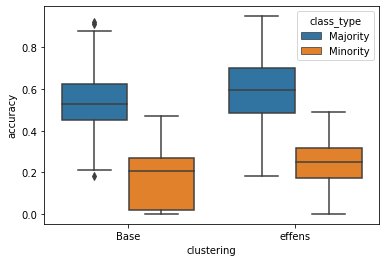

In [107]:
sns.boxplot(data=min_maj_acc_df, hue="class_type", x="clustering", y="accuracy")

In [30]:
predictions["count"].describe()["25%"]

10.0

In [86]:
all_acc_df = min_maj_acc_df.groupby(["classifier", "clustering", 
                       ])[["accuracy"]].mean().reset_index()
all_acc_df["class_type"] = "All"

In [89]:
all_acc_df

,classifier,clustering,accuracy,class_type
0,DecisionTreeClassifier,Base,34.4,All
1,DecisionTreeClassifier,effens,35.9,All
2,DummyClassifier,Base,22.0,All
3,DummyClassifier,effens,36.9,All
4,LogisticRegression,Base,42.9,All
5,LogisticRegression,effens,48.4,All
6,RandomForestClassifier,Base,43.5,All
7,RandomForestClassifier,effens,45.0,All
0,DecisionTreeClassifier,Base,45.3,Majority
1,DecisionTreeClassifier,Base,23.5,Minority


In [87]:
all_acc_df = pd.concat([all_acc_df,
           min_maj_acc_df.groupby(["classifier", "clustering", "class_type"
                       ])[["accuracy"]].mean().round(3).reset_index()])

In [88]:
#all_acc_df["accuracy"] = (all_acc_df["accuracy"]*100).round(1)
print(all_acc_df.pivot(index=["classifier", "clustering"],
                 columns="class_type", 
                 values="accuracy").to_latex())

\begin{tabular}{llrrr}
\toprule
                       & class\_type &   All &  Majority &  Minority \\
classifier & clustering &       &           &           \\
\midrule
DecisionTreeClassifier & Base &  34.4 &      45.3 &      23.5 \\
                       & effens &  35.9 &      47.4 &      24.4 \\
DummyClassifier & Base &  22.0 &      44.1 &       0.0 \\
                       & effens &  36.9 &      59.7 &      14.1 \\
LogisticRegression & Base &  42.9 &      62.9 &      23.0 \\
                       & effens &  48.4 &      68.3 &      28.6 \\
RandomForestClassifier & Base &  43.5 &      61.8 &      25.1 \\
                       & effens &  45.0 &      62.6 &      27.3 \\
\bottomrule
\end{tabular}



In [73]:
print(pd.concat([all_acc_df,
           min_maj_acc_df.groupby(["classifier", "clustering", "class_type"
                       ])[["accuracy"]].mean().round(3).reset_index()]).pivot(index=["classifier",
                                                                            "clustering"],
                                                                     columns="class_type", 
                                                                     values="accuracy").to_latex())

\begin{tabular}{llrrr}
\toprule
                       & class\_type &       All &  Majority &  Minority \\
classifier & clustering &           &           &           \\
\midrule
DecisionTreeClassifier & Base &  0.343568 &     0.453 &     0.235 \\
                       & effens &  0.359264 &     0.474 &     0.244 \\
DummyClassifier & Base &  0.220390 &     0.441 &     0.000 \\
                       & effens &  0.368980 &     0.597 &     0.141 \\
LogisticRegression & Base &  0.429461 &     0.629 &     0.230 \\
                       & effens &  0.484176 &     0.683 &     0.286 \\
RandomForestClassifier & Base &  0.434537 &     0.618 &     0.251 \\
                       & effens &  0.449761 &     0.626 &     0.273 \\
\bottomrule
\end{tabular}



In [103]:
all_acc_df[all_acc_df["class_type"] == "All"].pivot(index=["classifier", "class_type"],
                                                                     columns="clustering", 
                                                                     values="accuracy")

,clustering,Base,effens
classifier,class_type,,
DecisionTreeClassifier,All,34.4,35.9
DummyClassifier,All,22.0,36.9
LogisticRegression,All,42.9,48.4
RandomForestClassifier,All,43.5,45.0


In [54]:
min_maj_acc_df.groupby(["classifier", "clustering", "class_type"])[["accuracy"]].describe()["accuracy"]["mean"].round(3)*100

classifier              clustering  class_type
DecisionTreeClassifier  Base        Majority      45.3
                                    Minority      23.5
                        effens      Majority      47.4
                                    Minority      24.4
DummyClassifier         Base        Majority      44.1
                                    Minority       0.0
                        effens      Majority      59.7
                                    Minority      14.1
LogisticRegression      Base        Majority      62.9
                                    Minority      23.0
                        effens      Majority      68.3
                                    Minority      28.6
RandomForestClassifier  Base        Majority      61.8
                                    Minority      25.1
                        effens      Majority      62.6
                                    Minority      27.3
Name: mean, dtype: float64

In [23]:
min_maj_accuracy_df = pd.DataFrame()

predictions = pd.read_csv(f"../eval_dg_results/predictions/run_0/classification/{classifier}/{clustering}/{data}")
predictions["pred_label"] = predictions["pred_label"].apply(lambda x: ast.literal_eval(x) [0] if type(x) !=int else x)
predictions["accuracy"] = (predictions["true_label"] == predictions["pred_label"]).astype(int)
predictions["count"] = predictions.groupby("true_label")["true_label"].transform("count")
median_count = predictions["count"].median()
predictions["class_type"] = predictions["count"].apply(lambda x: "Majority" if x > median_count else "Minority")
print(data)
print("accuracy per class:")
print(predictions.groupby("class_type")["accuracy", "count"].mean())

print(predictions[predictions["class_type"] == "Majority"].groupby("class_type")["accuracy", "count"].mean())
class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
class_type_acc["dataset"] = dataset
print(predictions[predictions["class_type"] == "Minority"].groupby("class_type")["accuracy", "count"].mean())
min_maj_accuracy_df = pd.concat([min_maj_accuracy_df, [""]])
print(median_count)
print(predictions)

dataset1000_clusters50_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.669118  46.808824
Minority    0.280488  10.914634
            accuracy      count
class_type                     
Majority    0.669118  46.808824
            accuracy      count
class_type                     
Minority    0.280488  10.914634
19.0
     Unnamed: 0  true_label  pred_label  accuracy  count class_type
0             0           4           5         0     12   Minority
1             1          12          11         0     70   Majority
2             2           4           6         0     12   Minority
3             3          15          14         0     10   Minority
4             4           7           7         1     19   Minority
..          ...         ...         ...       ...    ...        ...
295         295           3           5         0     14   Minority
296         296          14          17         0     20   Majori

<ipython-input-23-3ba88d47347a>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-23-3ba88d47347a>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions[predictions["class_type"] == "Majority"].groupby("class_type")["accuracy", "count"].mean())
<ipython-input-23-3ba88d47347a>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions[predictions["class_type"] == "Minority"].groupby("class_type")["accuracy", "count"].mean())
